<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

Ce notebook est la suite de celui sur le traitement des descriptions. On récupère les données nettoyées pour les catégories des produits.

## Imports

In [1]:
# Chargement des librairies
# Standard
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image Processing
from matplotlib.image import imread
from PIL import Image as PilImage

# Deep Learning - TensorFlow/Keras
os.environ["KERAS_BACKEND"] = "torch"
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inceptionresnetv2
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet201
from tensorflow.keras.utils import to_categorical

# Custom Modules
from Deveau_Estelle_4_IMG_func_042024 import *

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'champagne_products.csv',
 'data',
 'Deveau_Estelle_1_notebook_txt_faisabilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'Deveau_Estelle_3_notebook_img_faisabilite_042024.ipynb',
 'Deveau_Estelle_4_IMG_func_042024.py',
 'Deveau_Estelle_5_notebook_img_classification_042024.ipynb',
 'Deveau_Estelle_6_notebook_API_042024.ipynb',
 'exemple.jpg',
 'model_augmented_best.weights.h5',
 'model_augmented_data_best.weights.h5',
 'model_augmented_data_best_with_generator.weights.h5',
 'model_augmented_data_best_with_seq.weights.h5',
 'model_best.keras',
 'model_best.weights.h5',
 'model_densenet201_best.weights.h5',
 'model_inceptionresnetv2_best.weights.h5',
 'model_iresnetv2_ad_best.weights.h5',
 'model_vgg16_best.weights.h5',
 'OC_projet6.pptx',
 'pythonProject',
 'svg',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 'Weather_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/Cleaned/")

['data.csv']

In [4]:
path     = "./data/Cleaned/"
filename = "data.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
path     = "./data/Sources/Images/"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


# Classification supervisée

In [7]:
cols_to_keep = ['uniq_id', 'product_category']
df = data[cols_to_keep]
df.head(5)

,uniq_id,product_category
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing


In [8]:
image_paths = [f"{path}{uid}.jpg" for uid in df['uniq_id']]

# Encodage des catégories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(df['product_category'])
category_names = label_encoder.classes_

## Séparation des jeux de données (train, val, test)

In [9]:
y = to_categorical(categories_encoded, 7)

In [10]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [11]:
# Diviser les chemins d'image et les étiquettes
paths_train, paths_test, y_train, y_test = train_test_split(image_paths, y, test_size=0.2, random_state=42)
paths_train, paths_val, y_train, y_val = train_test_split(paths_train, y_train, test_size=0.25, random_state=42)

In [12]:
y_test[:5]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

## Evaluation des modèles sélectionnés

In [14]:
# Définir le seuil à un niveau supérieur spécifique
PilImage.MAX_IMAGE_PIXELS = 100000000

### VGG16

In [15]:
# Préparation des données
X_train_vgg16, X_val_vgg16, X_test_vgg16 = prepare_data(paths_train, paths_val, paths_test, preprocess_vgg16,
                                                        target_size=(224, 224, 3))

In [16]:
# Création du modèle
model_vgg16 = create_model_fct(base_model_name='VGG16')

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2792 - loss: 6.8351
Epoch 1: val_loss improved from inf to 1.53991, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.2847 - loss: 6.7578 - val_accuracy: 0.7714 - val_loss: 1.5399
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7295 - loss: 1.9320
Epoch 2: val_loss did not improve from 1.53991
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.7292 - loss: 1.9348 - val_accuracy: 0.7857 - val_loss: 1.5560
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7479 - loss: 1.4803
Epoch 3: val_loss improved from 1.53991 to 1.26272, saving model to ./model_vgg16_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.7492 - loss: 1.4747 - val_accuracy: 0.7857 - val_loss: 1.2627
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8441 - loss: 0.8215
Epoch 4: val_loss improved from 1.26272 to 1.10677, saving model t

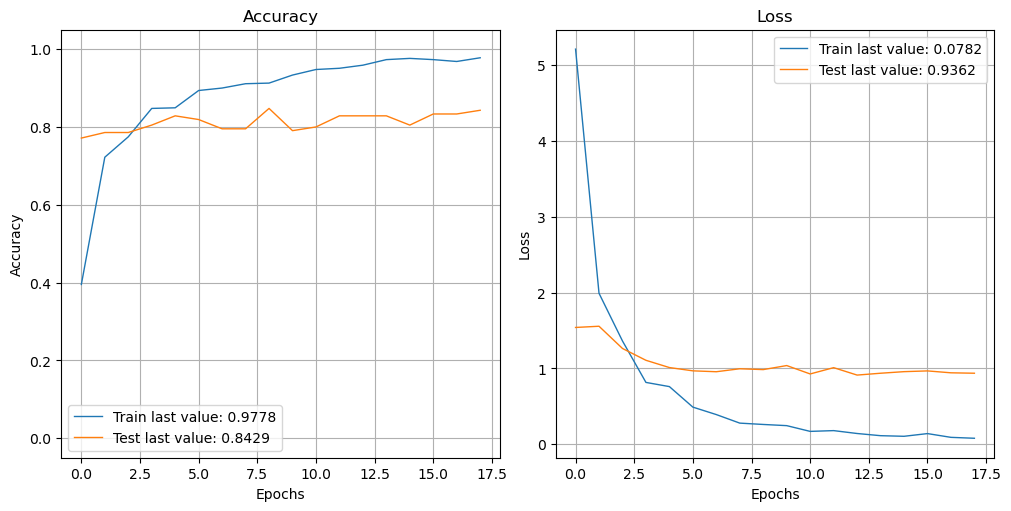

In [17]:
# Entraînement du modèle
model_vgg16, duration_vgg16 = train_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16, y_val,
                                          model_save_path="./model_vgg16_best.weights.h5")

In [18]:
# Évaluation du modèle
loss_vgg16, accuracy_vgg16, ari_score_vgg16 = evaluate_model(model_vgg16, X_train_vgg16, y_train, X_val_vgg16,
                                                             y_val, X_test_vgg16, y_test, best_weights_path="./model_vgg16_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 1.0000 - loss: 0.0054
Training Accuracy after last epoch: 1.0000

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8404 - loss: 0.6630
Test Accuracy after last epoch: 0.8286

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.8342 - loss: 0.8219
Validation Accuracy (best): 0.8286
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8489 - loss: 0.7676
Test Accuracy (best): 0.8333
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
Adjusted Rand Index (ARI): 0.6712


### InceptionResNetV2

In [19]:
# Préparation des données
X_train_inceptionresnetv2, X_val_inceptionresnetv2, X_test_inceptionresnetv2 = prepare_data(paths_train, paths_val,
                                                                                            paths_test, preprocess_inceptionresnetv2,
                                                                                            target_size=(299, 299, 3))

In [20]:
# Création du modèle
model_inceptionresnetv2 = create_model_fct(base_model_name='InceptionResNetV2')

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.4854 - loss: 1.4021
Epoch 1: val_loss improved from inf to 0.53291, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.4921 - loss: 1.3881 - val_accuracy: 0.8524 - val_loss: 0.5329
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8200 - loss: 0.6045
Epoch 2: val_loss improved from 0.53291 to 0.42343, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.8208 - loss: 0.6025 - val_accuracy: 0.8667 - val_loss: 0.4234
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.8706 - loss: 0.4302
Epoch 3: val_loss improved from 0.42343 to 0.40694, saving model to ./model_inceptionresnetv2_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - accuracy: 0.8709 - loss: 0.4292 - val_accuracy: 0.8667 - val_loss: 0.4069
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0

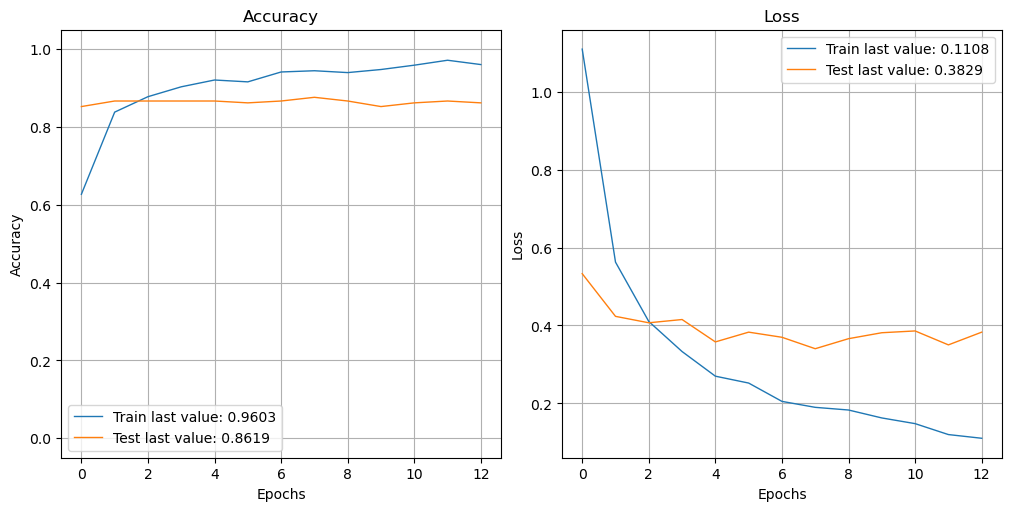

In [21]:
# Entraînement du modèle
model_iresnetv2, duration_iresnetv2 = train_model(model_inceptionresnetv2, X_train_inceptionresnetv2,
                                                  y_train, X_val_inceptionresnetv2, y_val,
                                                  model_save_path="./model_inceptionresnetv2_best.weights.h5")

In [22]:
# Évaluation du modèle
loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2 = evaluate_model(model_iresnetv2,
                                                                                                 X_train_inceptionresnetv2,
                                                                                                 y_train, X_val_inceptionresnetv2,
                                                                                                 y_val, X_test_inceptionresnetv2,
                                                                                                 y_test,
                                                                                                 best_weights_path="./model_inceptionresnetv2_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.9866 - loss: 0.0496
Training Accuracy after last epoch: 0.9857

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 0.8967 - loss: 0.4627
Test Accuracy after last epoch: 0.8857

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.8729 - loss: 0.3526
Validation Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.8985 - loss: 0.3686
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
Adjusted Rand Index (ARI): 0.7838


### DenseNet201

In [23]:
# Préparation des données
X_train_densenet201, X_val_densenet201, X_test_densenet201 = prepare_data(paths_train, paths_val, paths_test,
                                                                          preprocess_densenet201, target_size=(224, 224, 3))


In [24]:
# Création du modèle
model_densenet201 = create_model_fct(base_model_name='DenseNet201')


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.3803 - loss: 1.7493
Epoch 1: val_loss improved from inf to 0.64975, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.3867 - loss: 1.7330 - val_accuracy: 0.8000 - val_loss: 0.6497
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8351 - loss: 0.5597
Epoch 2: val_loss improved from 0.64975 to 0.53046, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.8356 - loss: 0.5593 - val_accuracy: 0.7905 - val_loss: 0.5305
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9052 - loss: 0.3558
Epoch 3: val_loss improved from 0.53046 to 0.48443, saving model to ./model_densenet201_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.9048 - loss: 0.3560 - val_accuracy: 0.8714 - val_loss: 0.4844
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9185 - loss: 0.26

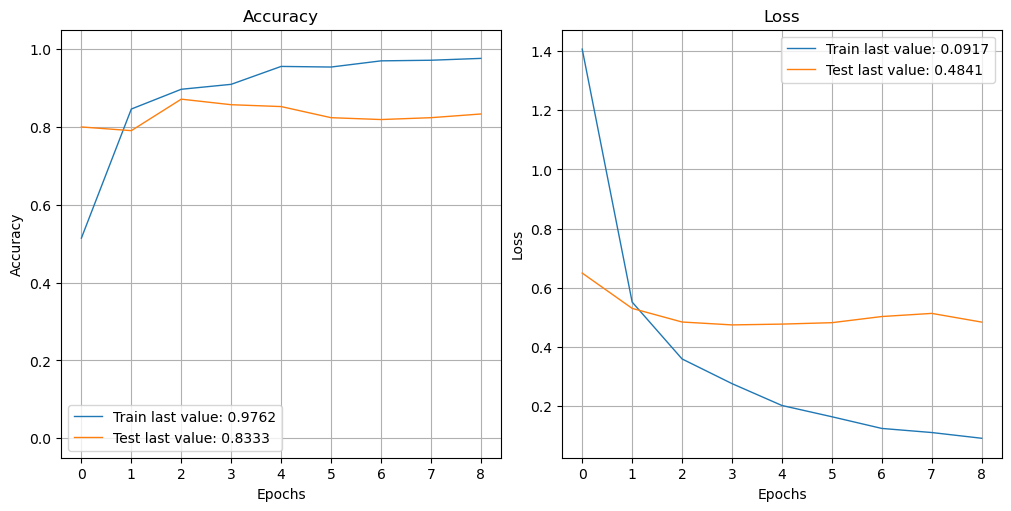

In [25]:
# Entraînement du modèle
model_densenet201, duration_densenet201 = train_model(model_densenet201, X_train_densenet201, y_train,
                                                      X_val_densenet201, y_val,
                                                      model_save_path="./model_densenet201_best.weights.h5")

In [26]:
# Évaluation du modèle
loss_densenet201, accuracy_densenet201, ari_score_densenet201 = evaluate_model(model_densenet201, X_train_densenet201,
                                                                               y_train, X_val_densenet201,
                                                                                y_val, X_test_densenet201, y_test,
                                                                               best_weights_path="./model_densenet201_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.9968 - loss: 0.0300
Training Accuracy after last epoch: 0.9952

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8984 - loss: 0.4050
Test Accuracy after last epoch: 0.8857

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.8559 - loss: 0.4724
Validation Accuracy (best): 0.8571
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.8969 - loss: 0.3514
Test Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
Adjusted Rand Index (ARI): 0.7535


### Comparaison des résultats

In [27]:
# Initialisation de la liste pour stocker les résultats
data_results = []

# Fonction pour ajouter les résultats d'un modèle au DataFrame
def add_results(model_name, loss, accuracy, ari_score, duration):
    metrics = ['Loss', 'Accuracy', 'Adjusted Rand Score', 'Duration (en heures)']
    scores = [loss, accuracy, ari_score, (duration/3600)]
    for metric, score in zip(metrics, scores):
        data_results.append({
            'Model': model_name,
            'Metric': metric,
            'Score': score
        })

In [28]:
add_results('VGG16', loss_vgg16, accuracy_vgg16, ari_score_vgg16, duration_vgg16)
add_results('InceptionResNetV2', loss_inceptionresnetv2, accuracy_inceptionresnetv2, ari_score_inceptionresnetv2, duration_iresnetv2)
add_results('DenseNet201', loss_densenet201, accuracy_densenet201, ari_score_densenet201, duration_densenet201)

data_metrics = pd.DataFrame(data_results)

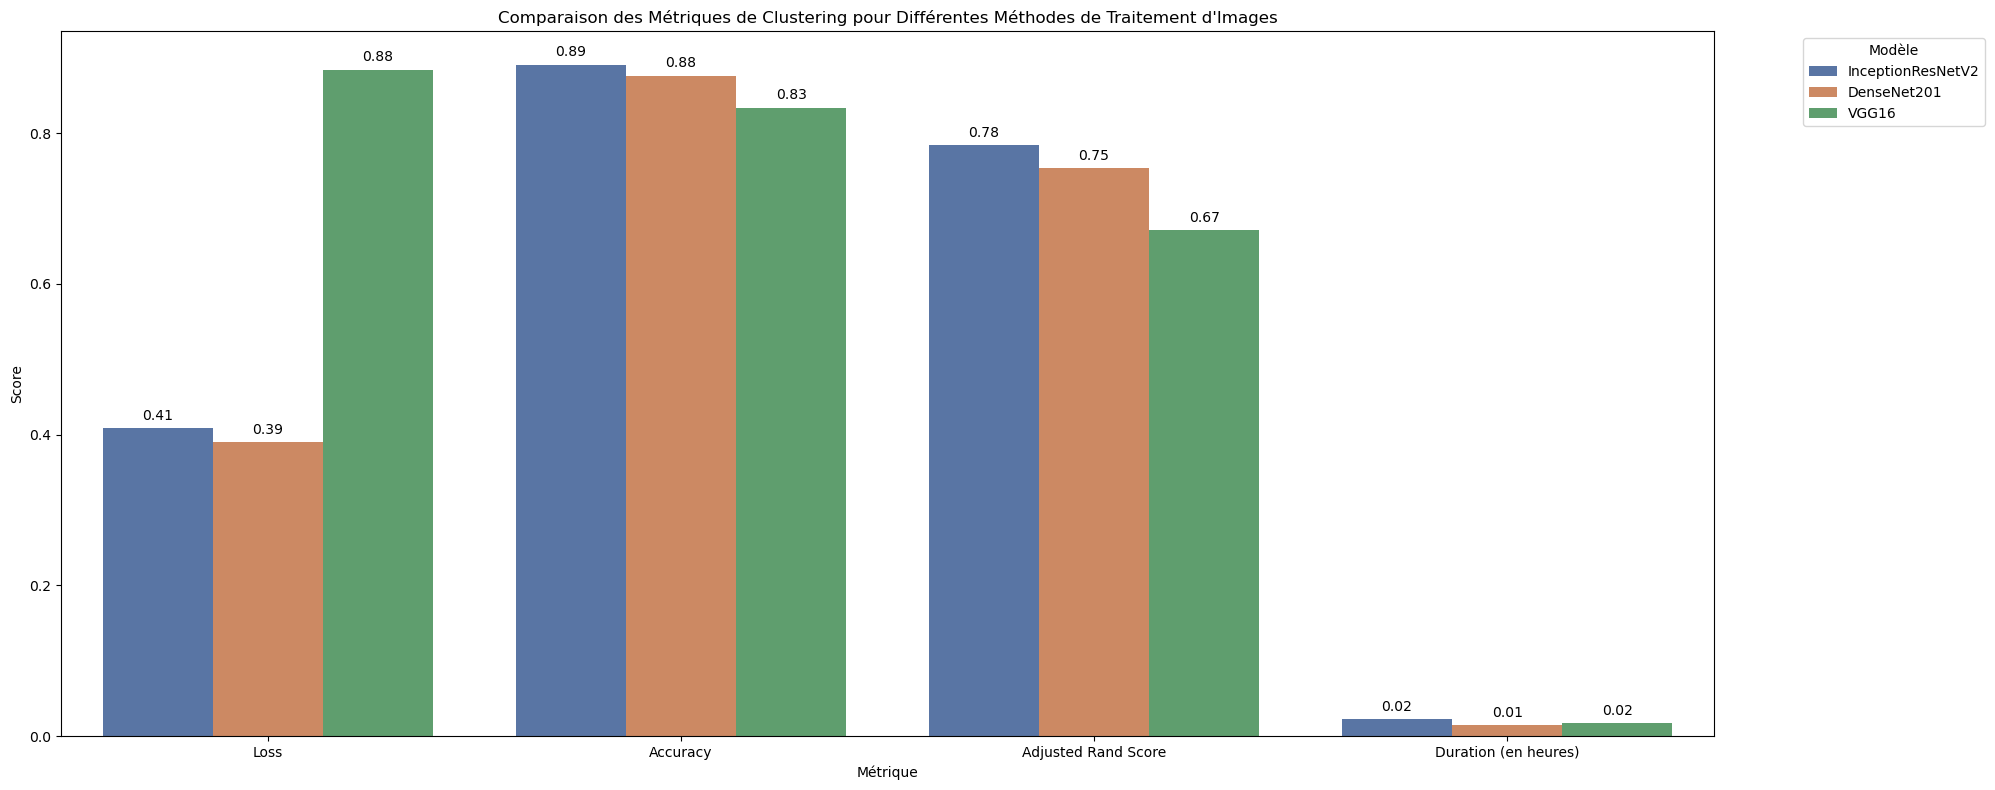

In [29]:
plot_model_performance(data_metrics)

# Optimisation

## Hyper paramètres

Testing with learning_rate=0.00075, batch_size=32, epochs=50

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00015000000130385163.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 12.
Finished 0.00075, 32 with val_accuracy=0.8714285492897034, duration=157.10482358932495
Testing with learning_rate=0.00075, batch_size=64, epochs=50
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 1.
Finished 0.00075, 64 with val_accuracy=0.8714285492897034, duration=730.1602401733398
Testing with learning_rate=0.0005, batch_size=32, epochs=50

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 5.
Finished 0.0005, 32 with val_accuracy=0.8857142925262451, duration=634.5946209430695
Testing with learning_ra

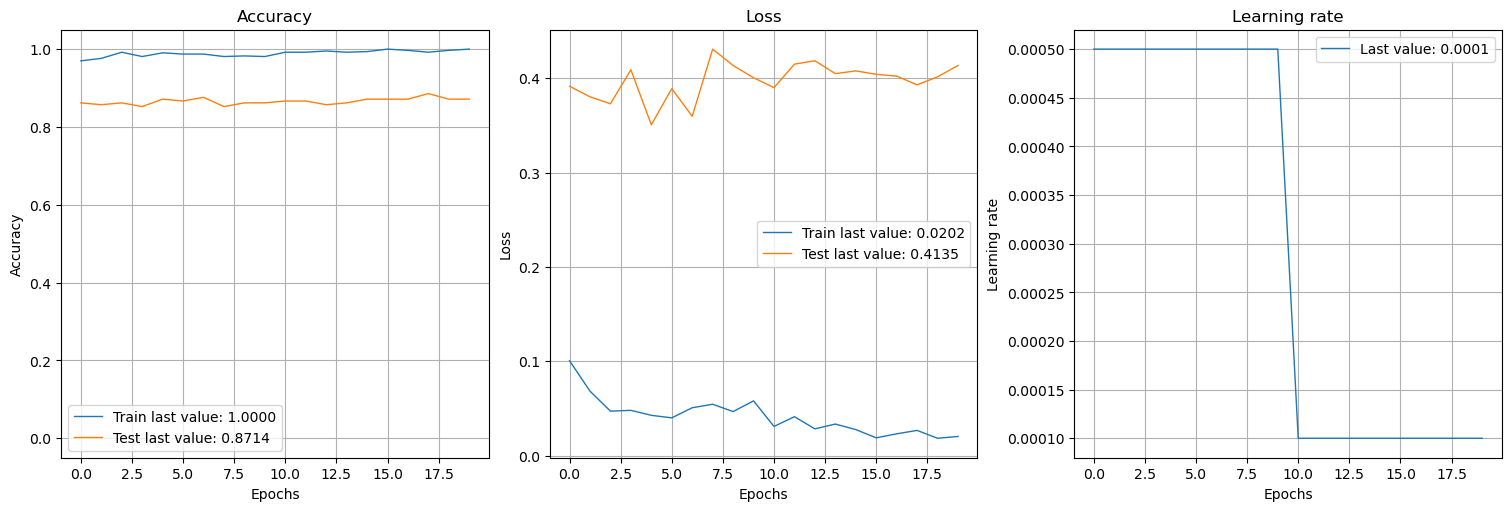

In [30]:
# Entraînement du modèle
best_model, duration_best = train_hyperparameters(model_iresnetv2, X_train_inceptionresnetv2, y_train, X_val_inceptionresnetv2,
                                                  y_val, "./model_best.weights.h5")

In [31]:
# Évaluation du modèle
loss_best, accuracy_best, ari_score_best = evaluate_model(best_model,
                                                          X_train_inceptionresnetv2,
                                                          y_train, X_val_inceptionresnetv2,
                                                          y_val, X_test_inceptionresnetv2,
                                                          y_test, best_weights_path="none")

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8670 - loss: 0.3530
Validation Accuracy (best): 0.8714
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8940 - loss: 0.4823
Test Accuracy (best): 0.8952
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Adjusted Rand Index (ARI): 0.7868


In [32]:
add_results('InceptionResNetV2(HP)', loss_best, accuracy_best, ari_score_best, duration_best)
data_metrics = pd.DataFrame(data_results)

In [33]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.883908
1,VGG16,Accuracy,0.833333
2,VGG16,Adjusted Rand Score,0.671187
3,VGG16,Duration (en heures),0.017046
4,InceptionResNetV2,Loss,0.408438
5,InceptionResNetV2,Accuracy,0.890476
6,InceptionResNetV2,Adjusted Rand Score,0.783791
7,InceptionResNetV2,Duration (en heures),0.022658
8,DenseNet201,Loss,0.390166
9,DenseNet201,Accuracy,0.876190


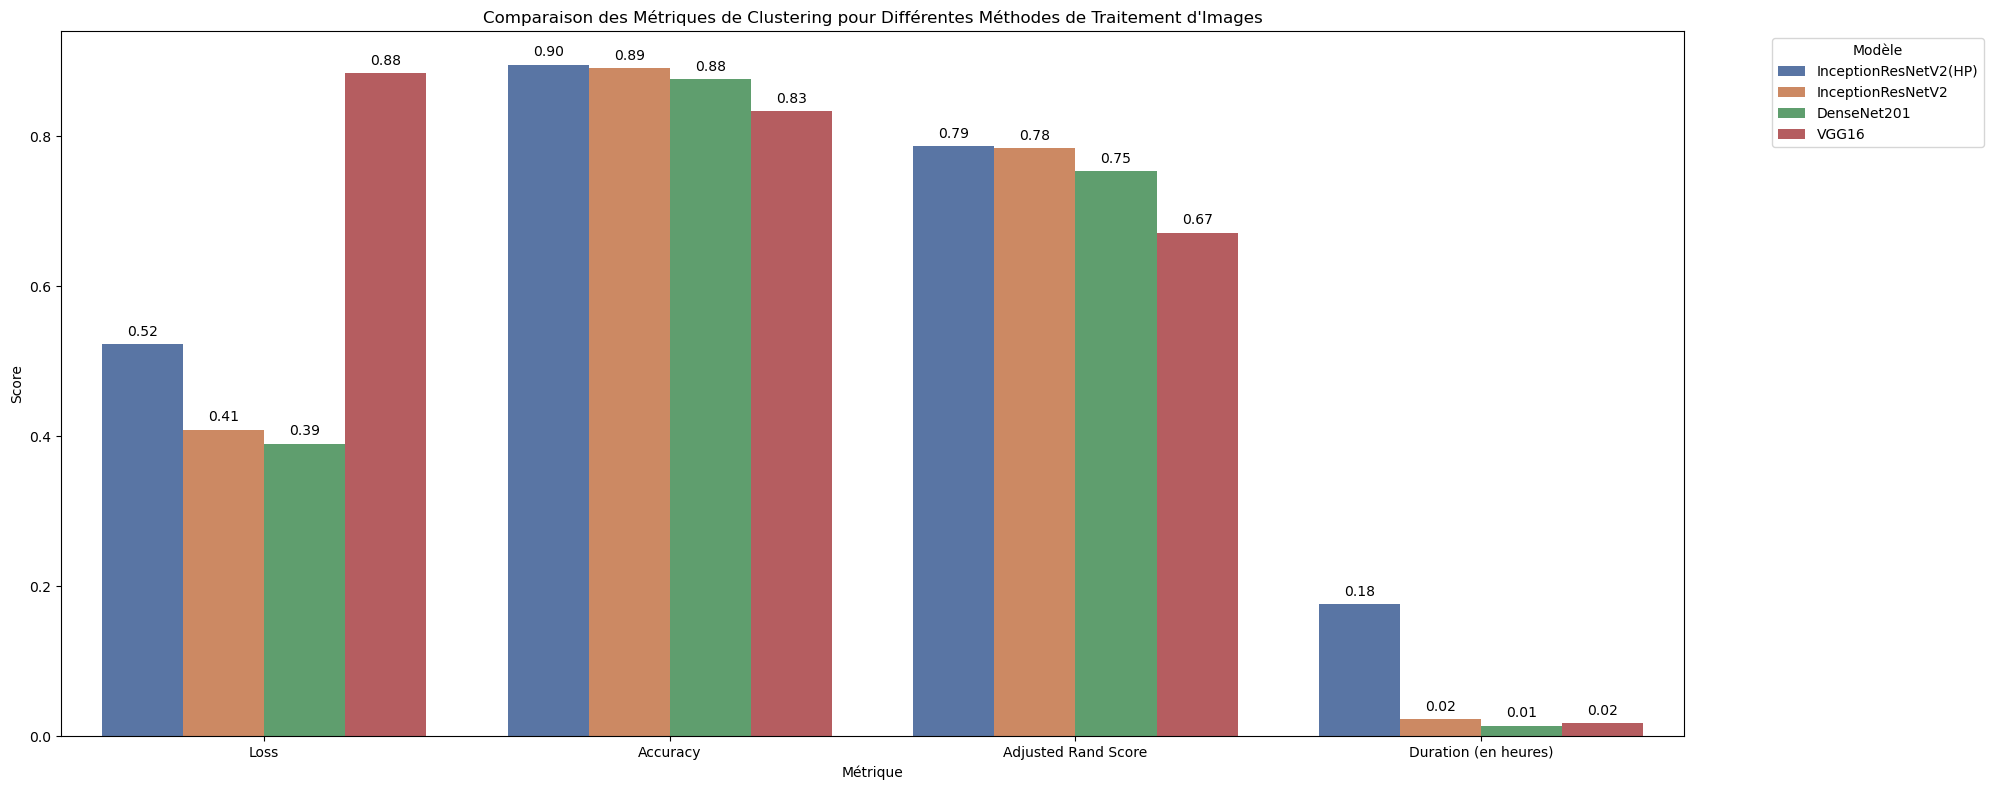

In [34]:
plot_model_performance(data_metrics)

## Data Augmentation

### ImageDataGenerator

In [35]:
train_generator= prepare_augmented_data(X_train_inceptionresnetv2, y_train)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9595 - loss: 0.1592
Epoch 1: val_loss improved from inf to 0.60275, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9591 - loss: 0.1603 - val_accuracy: 0.8429 - val_loss: 0.6028
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9540 - loss: 0.1388
Epoch 2: val_loss improved from 0.60275 to 0.41392, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9546 - loss: 0.1371 - val_accuracy: 0.8619 - val_loss: 0.4139
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9690 - loss: 0.0901
Epoch 3: val_loss improved from 0.41392 to 0.39665, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9688 - loss: 0.0901 - val_accuracy: 0.8619 - val_loss: 0.3966
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9772 - loss: 0.0680
Epoch 

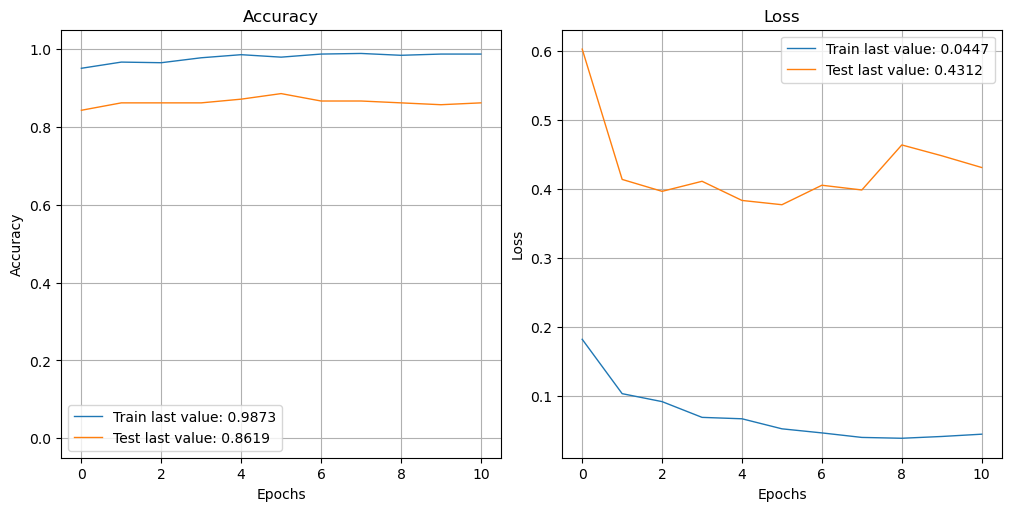

In [36]:
# Entraînement du modèle avec l'approche Sequential
model_augmented,  duration_augmented = train_model(model_iresnetv2,
                                                   train_generator.x, train_generator.y,
                                                   X_val_inceptionresnetv2, y_val,
                                                   "./model_augmented_data_best.weights.h5")

In [37]:
# Évaluation du modèle
loss_augmented, accuracy_augmented, ari_augmented = evaluate_model(model_augmented, train_generator.x, train_generator.y,
                                                                   X_val_inceptionresnetv2, y_val,
                                                                   X_test_inceptionresnetv2, y_test,
                                                                   "./model_augmented_data_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9936 - loss: 0.0196
Training Accuracy after last epoch: 0.9937

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8820 - loss: 0.5964
Test Accuracy after last epoch: 0.8810

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8794 - loss: 0.3984
Validation Accuracy (best): 0.8857
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8838 - loss: 0.5096
Test Accuracy (best): 0.8762
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
Adjusted Rand Index (ARI): 0.7517


In [38]:
add_results('InceptionResNetV2(ImageDataGenerator)', loss_augmented, accuracy_augmented, ari_augmented,
            duration_augmented)
data_metrics = pd.DataFrame(data_results)

In [39]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.883908
1,VGG16,Accuracy,0.833333
2,VGG16,Adjusted Rand Score,0.671187
3,VGG16,Duration (en heures),0.017046
4,InceptionResNetV2,Loss,0.408438
5,InceptionResNetV2,Accuracy,0.890476
6,InceptionResNetV2,Adjusted Rand Score,0.783791
7,InceptionResNetV2,Duration (en heures),0.022658
8,DenseNet201,Loss,0.390166
9,DenseNet201,Accuracy,0.876190


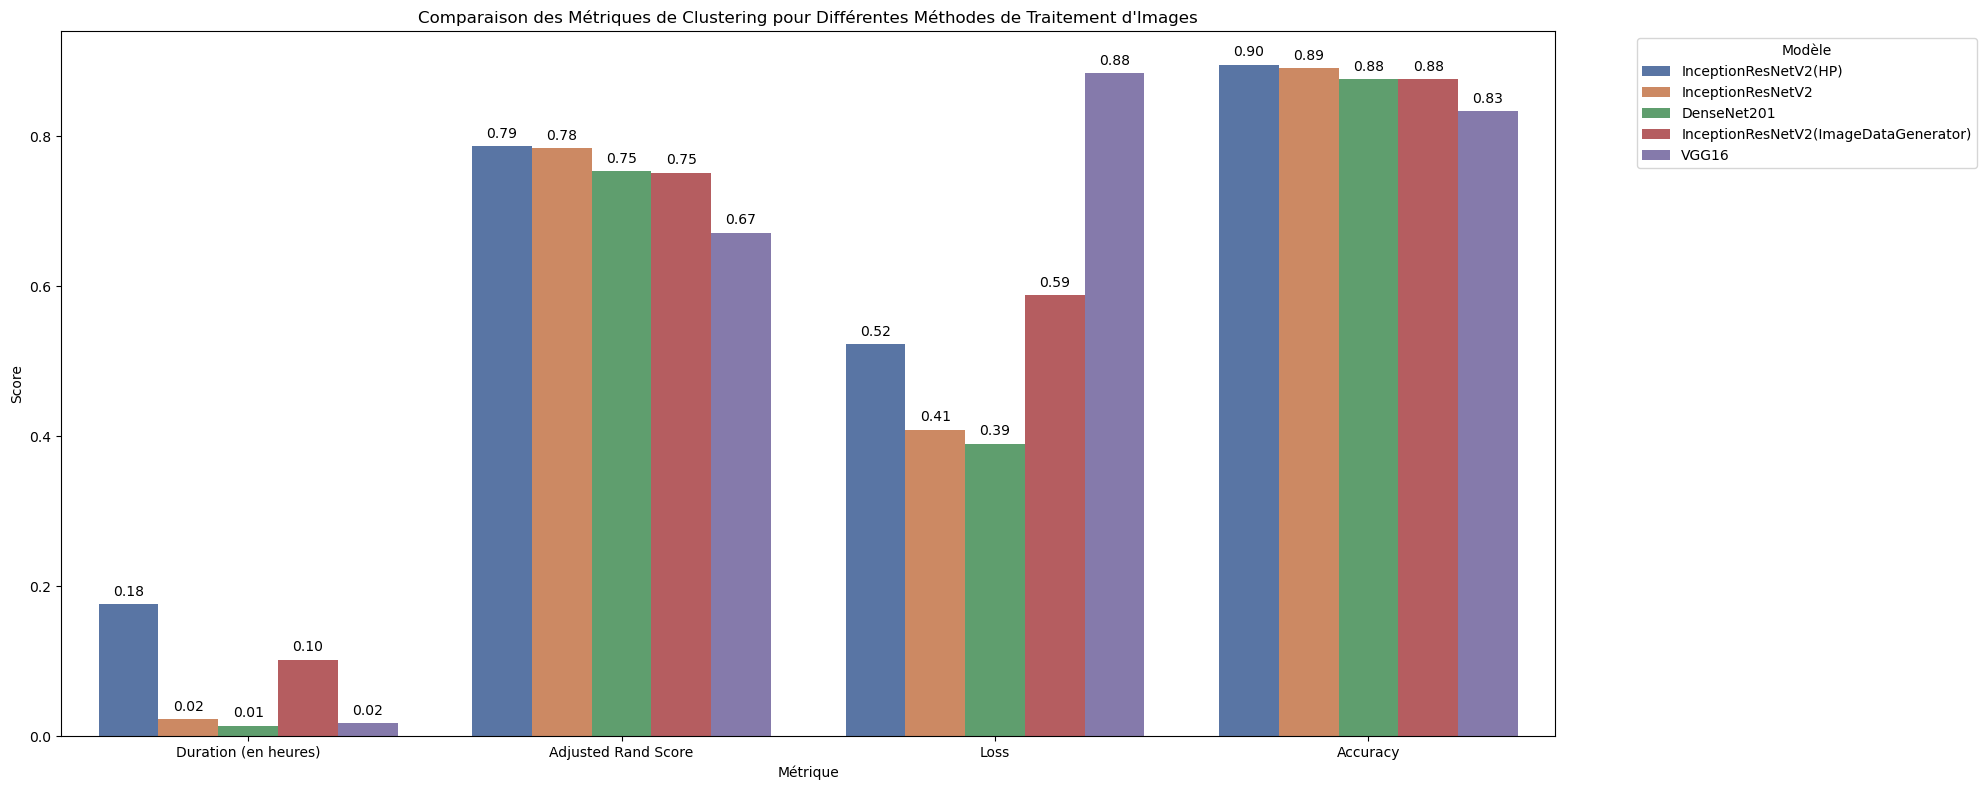

In [40]:
plot_model_performance(data_metrics)

### Sequential

In [41]:
# Préparation des données pour data augmentation
X_train, X_val, X_test = prepare_data_for_augmentation(paths_train, paths_val, paths_test, target_size=(299, 299))

In [42]:
# Création du modèle avec la data augmentation intégrée
seq_model = create_augmented_model()

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3396 - loss: 1.7368
Epoch 1: val_loss improved from inf to 0.68980, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3469 - loss: 1.7197 - val_accuracy: 0.7952 - val_loss: 0.6898
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7921 - loss: 0.7360
Epoch 2: val_loss improved from 0.68980 to 0.49609, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7920 - loss: 0.7354 - val_accuracy: 0.8476 - val_loss: 0.4961
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8220 - loss: 0.5707
Epoch 3: val_loss improved from 0.49609 to 0.44208, saving model to ./model_augmented_data_best.weights.h5
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8222 - loss: 0.5696 - val_accuracy: 0.8667 - val_loss: 0.4421
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8010 - loss: 0.5820
Epoch 

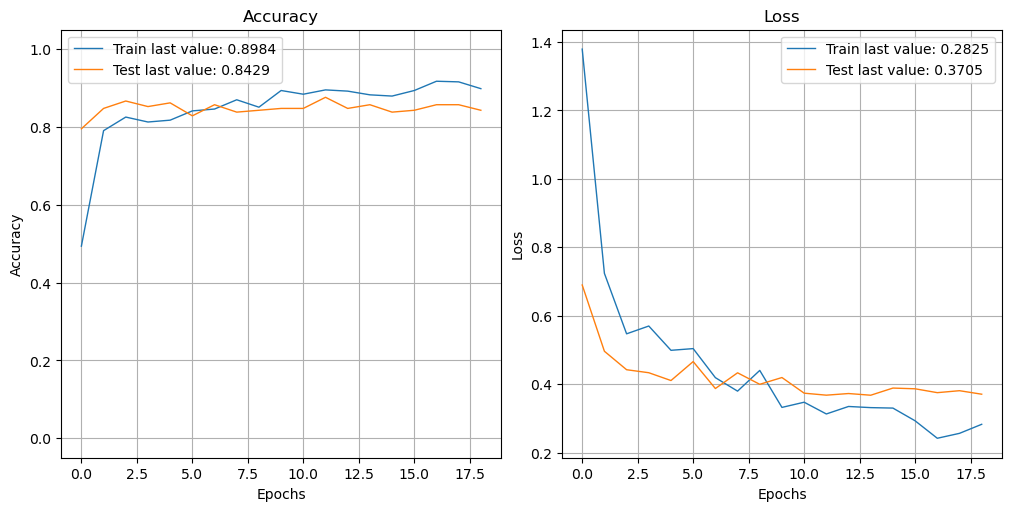

In [43]:
# Entraînement du modèle
seq_model, seq_duration = train_model(seq_model, X_train, y_train, X_val, y_val,
                                      "./model_augmented_data_best.weights.h5")

In [44]:
loss_with_sequential, accuracy_with_sequential, ari_score_with_sequential = evaluate_model(seq_model, X_train, y_train,
                                                                                           X_val, y_val, X_test, y_test,
                                                                                           "./model_augmented_data_best.weights.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9585 - loss: 0.1421
Training Accuracy after last epoch: 0.9556

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9069 - loss: 0.3838
Test Accuracy after last epoch: 0.8952

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8520 - loss: 0.3718
Validation Accuracy (best): 0.8571
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8945 - loss: 0.3694
Test Accuracy (best): 0.8857
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
Adjusted Rand Index (ARI): 0.7627


In [45]:
add_results('InceptionResNetV2(Sequential)', loss_with_sequential, accuracy_with_sequential, ari_score_with_sequential,
            seq_duration)
data_metrics = pd.DataFrame(data_results)

In [46]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.883908
1,VGG16,Accuracy,0.833333
2,VGG16,Adjusted Rand Score,0.671187
3,VGG16,Duration (en heures),0.017046
4,InceptionResNetV2,Loss,0.408438
5,InceptionResNetV2,Accuracy,0.890476
6,InceptionResNetV2,Adjusted Rand Score,0.783791
7,InceptionResNetV2,Duration (en heures),0.022658
8,DenseNet201,Loss,0.390166
9,DenseNet201,Accuracy,0.876190


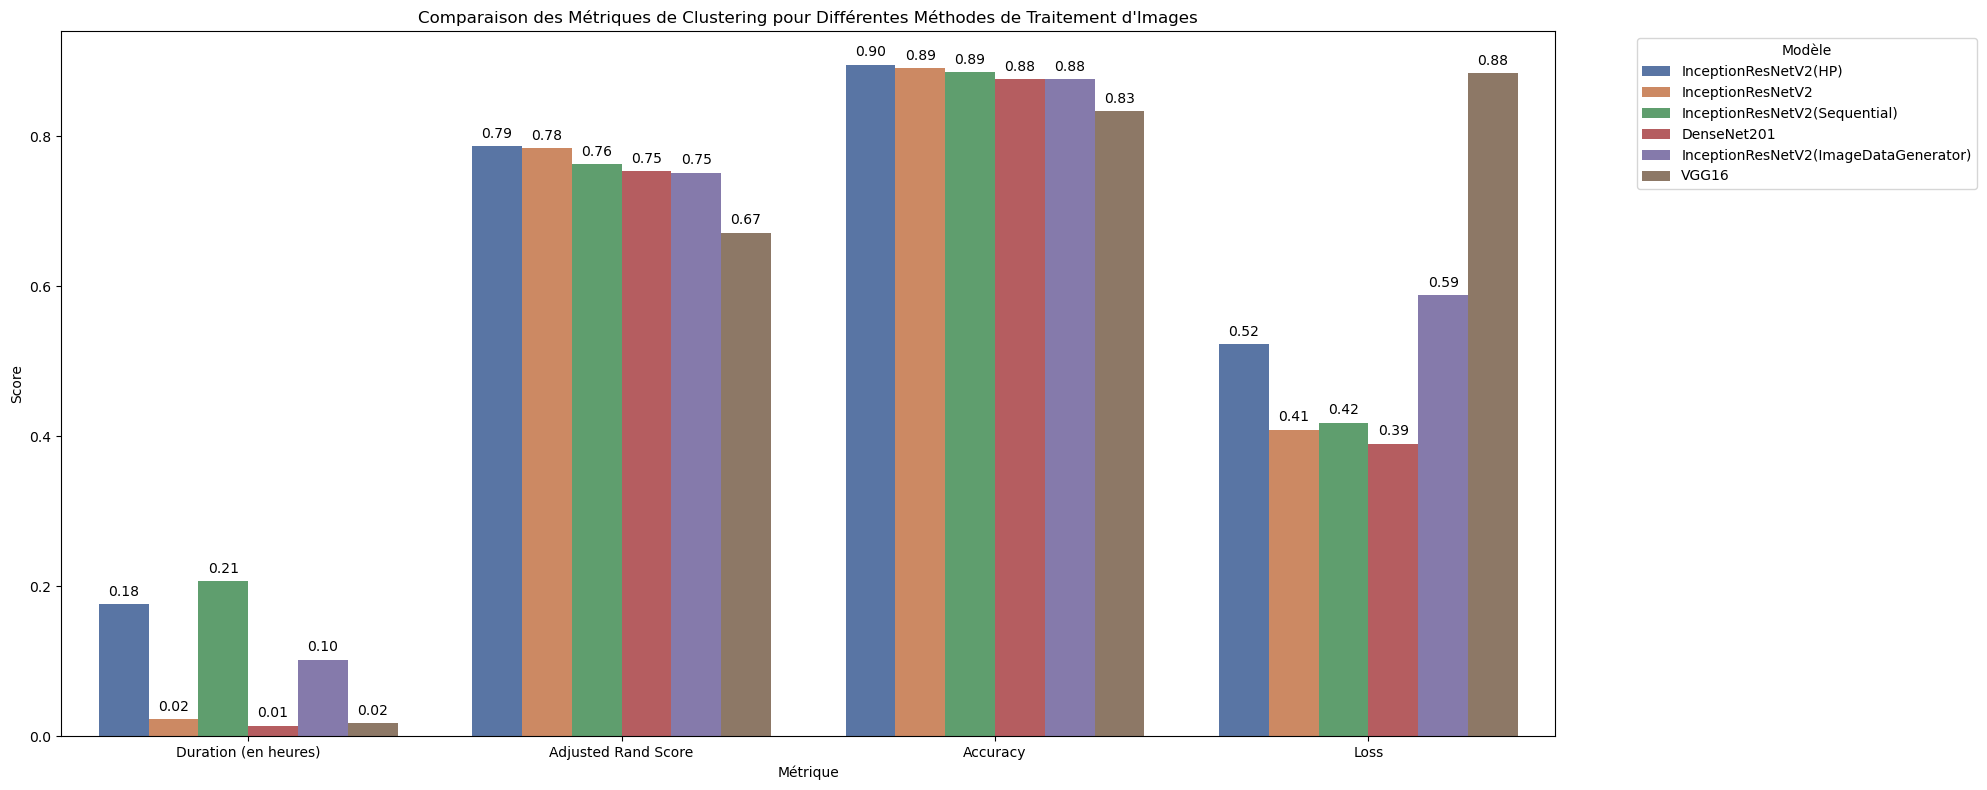

In [47]:
plot_model_performance(data_metrics)

### IA Generative

Utilisation de Copilot et du prompt :
"Créez une image haute résolution de [objet] sur un fond strictement blanc. Le sujet doit être vu de côté, montrant ses formes et caractéristiques distinctives. Assurez-vous que l'éclairage est parfaitement uniforme pour éliminer toutes les ombres sur le sujet et le fond. Le fond doit rester complètement blanc, sans nuances, textures ou autres éléments. L'image doit mettre en valeur uniquement le sujet, idéal pour des présentations de produit."

In [48]:
# Répertoires correspondant aux catégories
repertoires = {
    'Home Furnishing': "./data/Sources/generatedimages/homefurnishing",
    'Baby Care': "./data/Sources/generatedimages/baby",
    'Watches': "./data/Sources/generatedimages/watches",
    'Home Decor & Festive Needs': "./data/Sources/generatedimages/homedecor",
    'Kitchen & Dining': "./data/Sources/generatedimages/kitchen",
    'Beauty and Personal Care': "./data/Sources/generatedimages/beauty",
    'Computers': "./data/Sources/generatedimages/computers"
}

In [49]:
# Initialisation des listes pour les chemins d'image et les étiquettes
paths_train_gen = paths_train.copy()
y_train_gen = y_train.copy()

In [50]:
# Obtenir les catégories dans l'ordre d'encodage
categories = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Parcourir tous les répertoires
for categorie, repertoire in repertoires.items():
    # Récupérer l'indice de la catégorie dans l'encodage des catégories
    index_categorie = label_encoder.transform([categorie])[0]

    # Parcourir les images dans le répertoire
    for img in os.listdir(repertoire):
        # Créer le chemin complet de l'image
        chemin_image = os.path.join(repertoire, img)

        # Ajouter le chemin de l'image
        paths_train_gen.append(chemin_image)

        # Créer l'étiquette correspondante pour cette catégorie
        y_imggen_train = np.zeros(7)
        y_imggen_train[index_categorie] = 1

        # Ajouter l'étiquette
        y_train_gen = np.vstack([y_train_gen, y_imggen_train])

# Convertir les listes en tableaux numpy
paths_train_gen = np.array(paths_train_gen)

In [51]:
# Préparation des données
X_train_iresnetv2_ad, X_val_iresnetv2_ad, X_test_iresnetv2_ad = prepare_data(paths_train_gen, paths_val,
                                                                             paths_test, preprocess_inceptionresnetv2,
                                                                             target_size=(299, 299, 3))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9628 - loss: 0.1416
Epoch 1: val_loss improved from inf to 0.41741, saving model to ./model_iresnetv2_ad_best.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9622 - loss: 0.1431 - val_accuracy: 0.8619 - val_loss: 0.4174
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9507 - loss: 0.1364
Epoch 2: val_loss did not improve from 0.41741
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9510 - loss: 0.1360 - val_accuracy: 0.8476 - val_loss: 0.5686
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9704 - loss: 0.0909
Epoch 3: val_loss did not improve from 0.41741
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9702 - loss: 0.0910 - val_accuracy: 0.8714 - val_loss: 0.4445
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9774 - loss: 0.0701
Epoch 4: val_loss did not improve from 0.41741
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9774 - loss: 0.0701 - val_ac

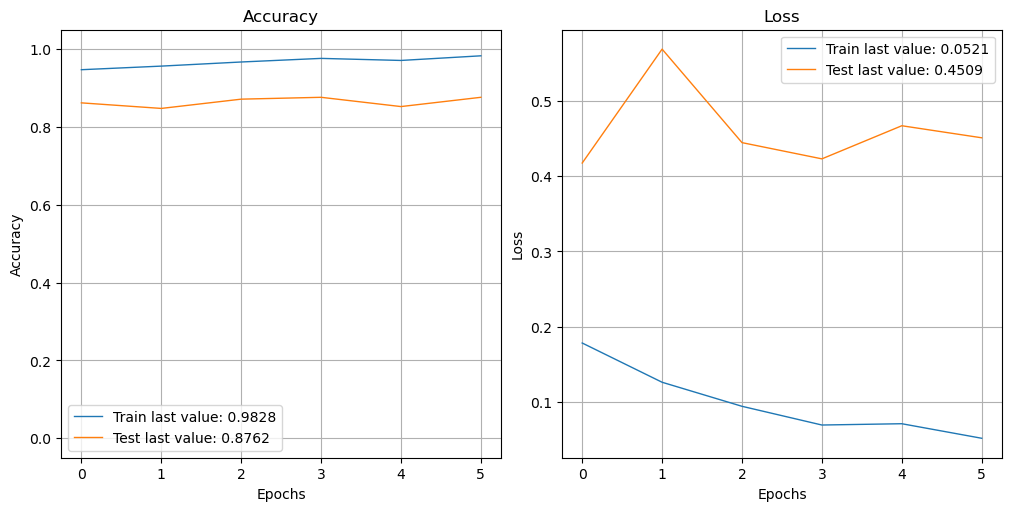

In [52]:
# Entraînement du modèle
model_iresnetv2_ad, duration_iresnetv2_ad = train_model(model_iresnetv2, X_train_iresnetv2_ad,
                                                        y_train_gen, X_val_iresnetv2_ad, y_val,
                                                        model_save_path="./model_iresnetv2_ad_best.weights.h5")

In [53]:
# Évaluation du modèle
loss_iresnetv2_ad, accuracy_iresnetv2_ad, ari_score_iresnetv2_ad = evaluate_model(model_iresnetv2_ad,
                                                                                  X_train_iresnetv2_ad,
                                                                                  y_train_gen, X_val_iresnetv2_ad,
                                                                                  y_val, X_test_iresnetv2_ad,
                                                                                  y_test,
                                                                                  best_weights_path="./model_iresnetv2_ad_best.weights.h5")

24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9885 - loss: 0.0240
Training Accuracy after last epoch: 0.9907

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8580 - loss: 0.5694
Test Accuracy after last epoch: 0.8619

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8611 - loss: 0.4680
Validation Accuracy (best): 0.8619
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8920 - loss: 0.5681
Test Accuracy (best): 0.8905
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step
Adjusted Rand Index (ARI): 0.7789


In [54]:
add_results('InceptionResNetV2(IA Generative)', loss_iresnetv2_ad, accuracy_iresnetv2_ad,
            ari_score_iresnetv2_ad, duration_iresnetv2_ad)
data_metrics = pd.DataFrame(data_results)

In [55]:
data_metrics

,Model,Metric,Score
0,VGG16,Loss,0.883908
1,VGG16,Accuracy,0.833333
2,VGG16,Adjusted Rand Score,0.671187
3,VGG16,Duration (en heures),0.017046
4,InceptionResNetV2,Loss,0.408438
5,InceptionResNetV2,Accuracy,0.890476
6,InceptionResNetV2,Adjusted Rand Score,0.783791
7,InceptionResNetV2,Duration (en heures),0.022658
8,DenseNet201,Loss,0.390166
9,DenseNet201,Accuracy,0.876190


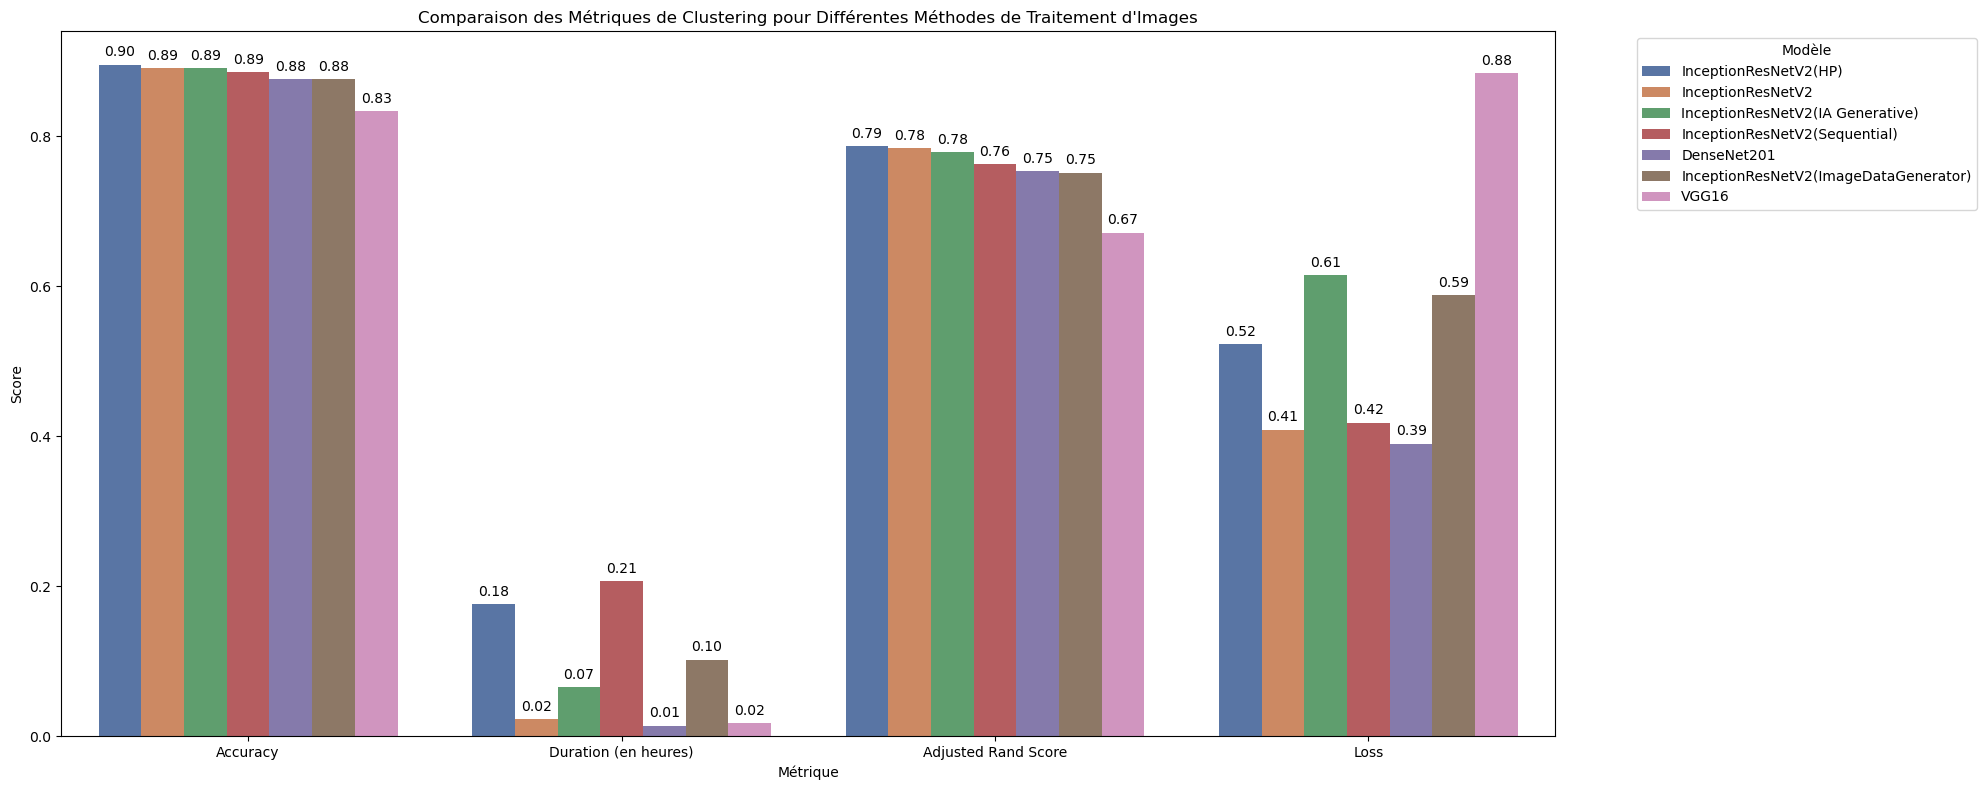

In [56]:
plot_model_performance(data_metrics)